In [32]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing, ds2df_echam
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

In [35]:

import numpy as np



In [36]:
plot_path = Path('Plots')

In [37]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}.png'
    return plot_path /f

In [38]:
plot_path.mkdir(exist_ok=True, parents=True)

# Load observational data: 

In [39]:
import pandas as pd

In [40]:
from bs_fdbck.constants import path_measurement_data

### Some definitions:

In [41]:
models = ['NorESM','ECHAM-SALSA','UKESM']

In [42]:
dic_mod2case={

}

## Settings:

In [43]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [44]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [45]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [46]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

### LOAD ECHAM SALSA

In [47]:



case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'

time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'

dic_mod2case[model_name] = case_name_echam

### Settings:

In [48]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [49]:
case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]

In [50]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-08-31 17:18:21,494 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


2022-08-31 17:18:21,494 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


### Variables

In [51]:
varl =[
      'apm',
'geom',
'airdens',
'tempair',
'uw',
'vw',
'ccn02',
'ccn10',
'cod',
'cwp',
'ceff',
'ceff_ct',
'lcdnc',
'lcdnc_ct',
'clfr',
'cl_time',
'aot550nm',
'aot865nm',
'ang550865',
'up_sw',
'up_sw_cs',
'up_sw_noa',
'up_sw_cs_noa',
'up_lw',
'up_lw_cs',
'up_lw_noa',
'up_lw_cs_noa',
'mmrtrN500',
'mmrtrN250',
'mmrtrN200',
'mmrtrN100',
'mmrtrN50',
'mmrtrN3',
'oh_con',
#'emi_monot_bio',
#'emi_isop_bio',
'SO2_gas',
'APIN_gas',
'TBETAOCI_gas',
'BPIN_gas',
'LIMON_gas',
'SABIN_gas',
'MYRC_gas',
'CARENE3_gas',
'ISOP_gas',
'VBS0_gas',
'VBS1_gas',
'VBS10_gas',
'ORG_mass',
      
      
      ] 

In [52]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [53]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2022-08-31 17:18:22,037 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [54]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

## LOAD UKESM


In [55]:



case_name = 'CRES'
case_name_ukesm = 'CRES'

time_res = 'hour'
space_res='locations'
model_name='UKESM'

dic_mod2case[model_name] = case_name_ukesm

### Settings:

In [56]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [57]:
case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_ukesm = [case_name]

In [58]:

log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-08-31 17:18:24,620 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


2022-08-31 17:18:24,620 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


### Variables

In [59]:
varl =[
    'tas',
    'sfmmroa',
      ]

In [60]:
for case_name in cases_ukesm:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc
UUUPS


In [61]:
dic_ds = dict()
for ca in cases_ukesm:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.copy()

2022-08-31 17:18:25,618 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc]


//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc
2022-08-31 17:18:25,618 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc]
['//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/tas_CRES_2012-01-01_2015-01-01_hour_locations.nc', '//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2012-01-01_2015-01-01_hour_locations.nc']


In [62]:
ds

<xarray.Dataset>
Dimensions:  (time: 30592, station: 7)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 ... 2014-12-31T18:00:00
    height   float64 1.5
  * station  (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
Data variables:
    sfmmroa  (station, time) float32 dask.array<chunksize=(7, 30592), meta=np.ndarray>
    tas      (station, time) float32 dask.array<chunksize=(7, 30592), meta=np.ndarray>

In [63]:
dic_mod_ca['UKESM'] = dic_ds.copy()

## LOAD NORESM

## Settings:

In [64]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [65]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [66]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [67]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [68]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'

In [69]:
model_name = 'NorESM'

dic_mod2case[model_name] = case_noresm

## Variables

In [70]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene',
      ]


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'NCONC01',
       #'SFisoprene',
       #'SFmonoterp',
       #'DOD500',
      'SFmonoterp','SFisoprene',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [71]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [72]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [73]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-08-31 17:18:29,408 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [74]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-08-31 17:18:31,674 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [75]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [76]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [77]:
case_mod

'OsloAero_intBVOC_f09_f09_mg17_fssp'

In [78]:
dic_ds = {case_mod: ds_comb}

In [79]:
dic_mod_ca['NorESM'] = dic_ds.copy()

## READ IN FROM FILE

In [80]:
_ds =dic_mod_ca['ECHAM-SALSA']['SALSA_BSOA_feedback']

In [81]:
_ds =dic_mod_ca['ECHAM-SALSA']['SALSA_BSOA_feedback']

In [153]:
fn = '/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/emi_monot_bio_SALSA_BSOA_feedback_2012-01-01_2012-02-01_hour_locations.nc'

In [154]:
_ds = xr.open_dataset(fn)

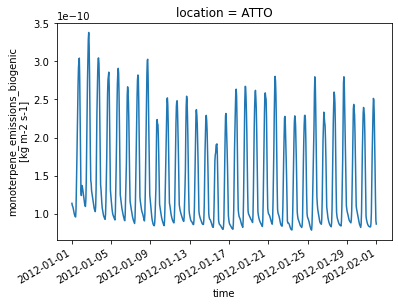

In [155]:
_ds['emi_monot_bio'].isel(location=4
                        ).plot()

In [192]:
fl = ['/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/ORG_mass_SALSA_BSOA_feedback_2012-01-01_2012-02-01_hour_locations.nc',
      '/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/emi_isop_bio_SALSA_BSOA_feedback_2012-01-01_2012-02-01_hour_locations.nc',
      '/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2012-02-01_hour_locations.nc',
     ]

In [193]:
_ds = xr.open_mfdataset(fl)
_ds_col = _ds.copy()

<function matplotlib.pyplot.ylim(*args, **kwargs)>

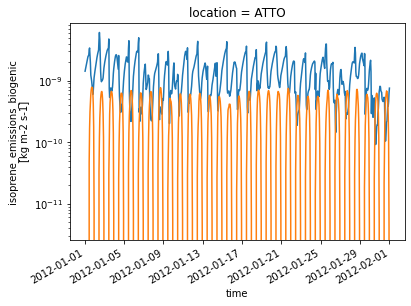

In [178]:
_ds['ORG_mass'].isel(lev=-1).isel(location=4
                        ).plot()


_ds['emi_isop_bio'].isel(location=4
                        ).plot()
plt.yscale('log')
plt.ylim

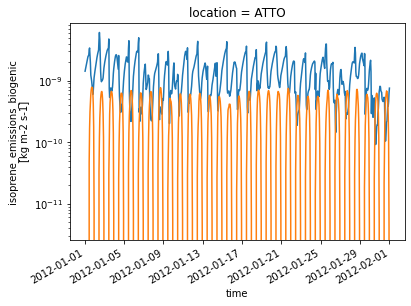

In [169]:
_ds['ORG_mass'].isel(lev=-1).isel(location=4
                        ).plot()


_ds['emi_isop_bio'].isel(location=4
                        ).plot()
plt.yscale('log')
plt.ylim

In [194]:
fl = ['/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201201_emi_monot_bio.nc',
     '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/ECHAM-SALSA/SALSA_BSOA_feedback/SALSA_BSOA_feedback_201201_ORG_mass.nc',
      
     ]

In [195]:
_ds = xr.open_mfdataset(fl)

In [196]:
_ds

<xarray.Dataset>
Dimensions:        (time: 744, lon: 192, lat: 96, lev: 47, nhyi: 48, nhym: 47)
Coordinates:
  * time           (time) datetime64[ns] 2012-01-01T00:52:30 ... 2012-01-31T2...
  * lon            (lon) float64 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * lat            (lat) float64 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
  * lev            (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 44.0 45.0 46.0 47.0
Dimensions without coordinates: nhyi, nhym
Data variables:
    hyai           (nhyi) float64 dask.array<chunksize=(48,), meta=np.ndarray>
    hybi           (nhyi) float64 dask.array<chunksize=(48,), meta=np.ndarray>
    hyam           (nhym) float64 dask.array<chunksize=(47,), meta=np.ndarray>
    hybm           (nhym) float64 dask.array<chunksize=(47,), meta=np.ndarray>
    ORG_mass       (time, lev, lat, lon) float32 dask.array<chunksize=(744, 47, 96, 192), meta=np.ndarray>
    emi_monot_bio  (time, lat, lon) float32 dask.array<chunksize=(744, 96, 192), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Wed Mar 30 14:39:58 2022: cdo -O -copy -setattribute,ORG_ma...
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

In [197]:
from bs_fdbck.util.plot.plot_maps import  subplots_map, fix_axis4map_plot

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


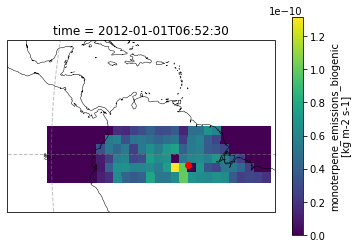

In [189]:
import cartopy.crs as ccrs

fig, ax = subplots_map()
_ds['emi_monot_bio'].sel(lat=slice(5,-5), lon=slice(270,320)).isel(time=6).plot(ax = ax, transform = ccrs.PlateCarree())
plt.scatter(300.999,-2.15, marker='o',  c='r', transform=ccrs.PlateCarree())
fix_axis4map_plot(ax)

ax.set_extent((-100., -40., -10., 20.))

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecate

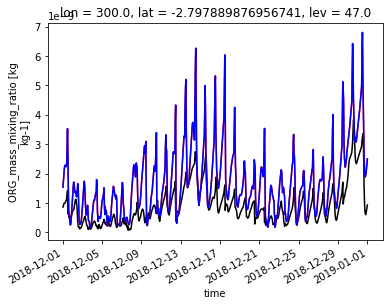

In [191]:
_ds['ORG_mass'].isel(lev=-1).sel(lon=300.999, lat=-2.15, method='nearest').plot(c='k')
_ds['ORG_mass'].isel(lev=-1).sel(lon=300., lat=-2.15, method='nearest').plot(c='r')
_ds['ORG_mass'].isel(lev=-1).sel(lon=300.93, lat=-2.15, method='nearest').plot(c='b')

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecate

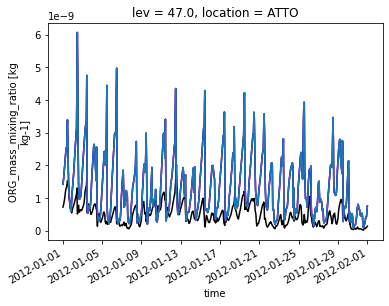

In [204]:
_ds['ORG_mass'].isel(lev=-1).sel(lon=300.999, lat=-2.15, method='nearest').plot(c='k')
_ds['ORG_mass'].isel(lev=-1).sel(lon=300., lat=-2.15, method='nearest').plot(c='r')
_ds['ORG_mass'].isel(lev=-1).sel(lon=300.93, lat=-2.15, method='nearest').plot(c='b')

_ds_col.isel(lev=-1).sel(location='ATTO')['ORG_mass'].plot(c='m')

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecate

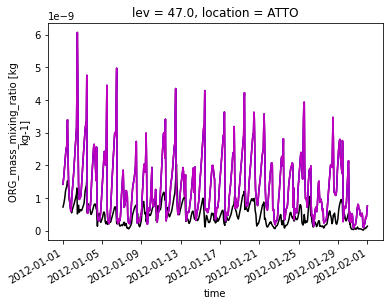

In [205]:
_ds['ORG_mass'].isel(lev=-1).sel(lon=300.999, lat=-2.15, method='nearest').plot(c='k')
_ds['ORG_mass'].isel(lev=-1).sel(lon=300., lat=-2.15, method='nearest').plot(c='r')
_ds['ORG_mass'].isel(lev=-1).sel(lon=300.93, lat=-2.15, method='nearest').plot(c='b')

_ds_col.isel(lev=-1).sel(location='ATTO')['ORG_mass'].plot(c='m')

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecate

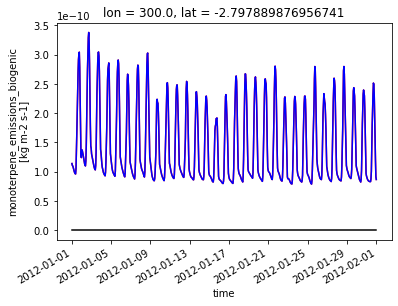

In [145]:
_ds['emi_monot_bio'].sel(lon=300.999, lat=-2.15, method='nearest').plot(c='k')
_ds['emi_monot_bio'].sel(lon=300., lat=-2.15, method='nearest').plot(c='r')
_ds['emi_monot_bio'].sel(lon=300.93, lat=-2.15, method='nearest').plot(c='b')

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecate

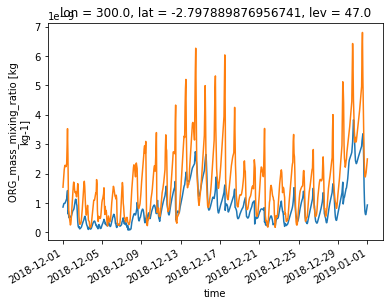

In [92]:
_ds['ORG_mass'].sel(lon=300.999, lat=-2.15, method='nearest').isel(lev=-1).plot()
_ds['ORG_mass'].sel(lon=300., lat=-2.15, method='nearest').isel(lev=-1).plot()

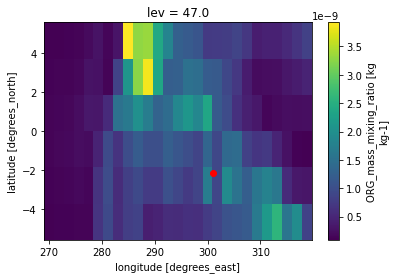

In [93]:
_ds['ORG_mass'].isel(lev=-1).sel(lat=slice(5,-5), lon=slice(270,320)).mean('time').plot()
plt.scatter(300.999,-2.15, marker='o',  c='r')

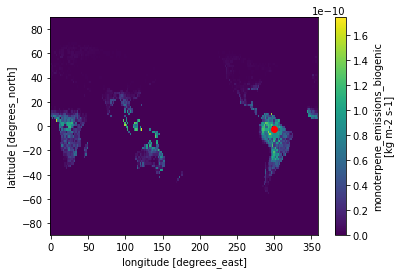

In [94]:
_ds['emi_monot_bio'].mean('time').plot()
plt.scatter(300,-2.15, marker='o',  c='r')

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


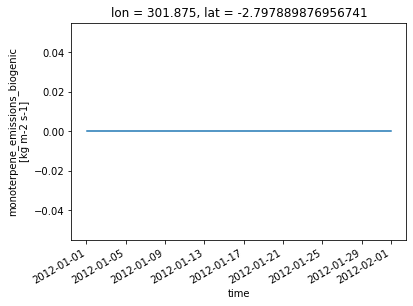

In [95]:
_ds['emi_monot_bio'].sel(lon=300.999,lat=-2.15, method='nearest').plot()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


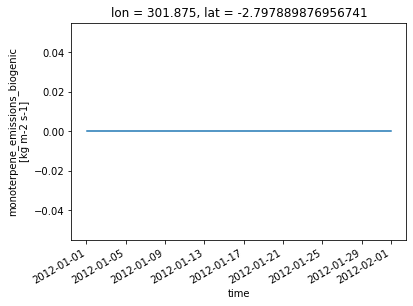

In [96]:
_ds['emi_monot_bio'].sel(lat=-2.150, lon=300.9998, method = 'nearest').plot()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


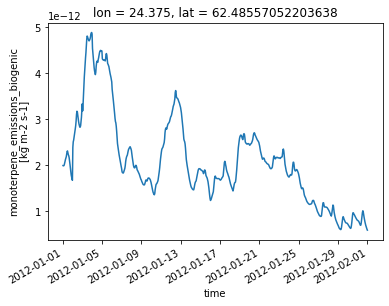

In [97]:
_ds['emi_monot_bio'].sel(lat=62,lon=24, method = 'nearest').plot()

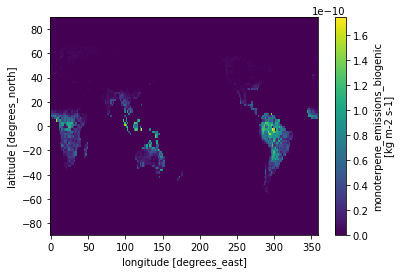

In [98]:
_ds['emi_monot_bio'].mean('time').plot()

In [99]:
_ds =dic_mod_ca['NorESM'][case_noresm]

In [100]:
_ds

<xarray.Dataset>
Dimensions:     (time: 61345, station: 7, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
  * station     (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/36)
    ACTREL      (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    ...          ...
    SOA_LV      (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SOA_NA      (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>

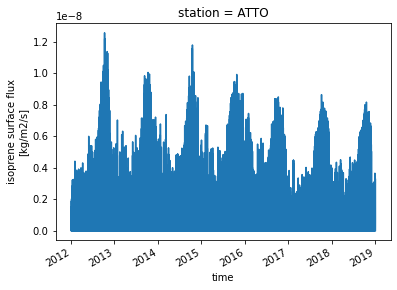

In [102]:
_ds.sel(station='ATTO')['SFisoprene'].plot()

In [104]:
_ds.sel(station='ATTO')['OA'].plot()

KeyError: 'OA'

## NorESM

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


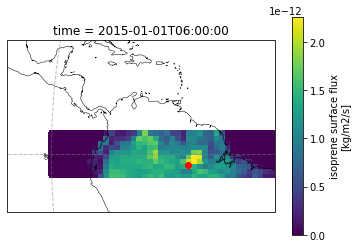

In [146]:
f = '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f09_f09_mg17_ssp245/atm/hist/OsloAero_intBVOC_f09_f09_mg17_ssp245.cam.h1.2015-01-01-00000.nc'

ds = xr.open_dataset(f)

import cartopy.crs as ccrs

fig, ax = subplots_map()
ds['SFisoprene'].sel(lat=slice(-5,5), lon=slice(270,320)).isel(time=6).plot(ax = ax, transform = ccrs.PlateCarree())
plt.scatter(300.999,-2.15, marker='o',  c='r', transform=ccrs.PlateCarree())
fix_axis4map_plot(ax)

ax.set_extent((-100., -40., -10., 20.))

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecate

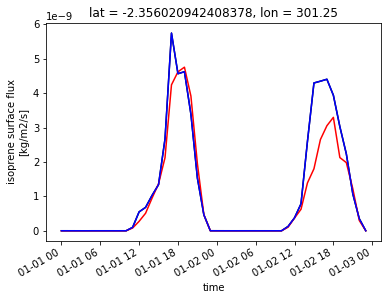

In [150]:
ds['SFisoprene'].sel(lon=300.999, lat=-2.15, method='nearest').plot(c='k')
ds['SFisoprene'].sel(lon=300., lat=-2.15, method='nearest').plot(c='r')
ds['SFisoprene'].sel(lon=300.9, lat=-2.15, method='nearest').plot(c='b')

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


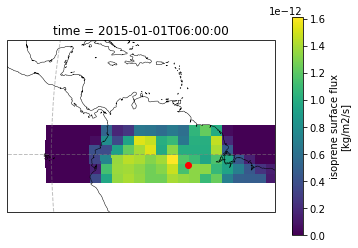

In [139]:
f = '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-01-00000.nc'

ds = xr.open_dataset(f)

import cartopy.crs as ccrs

fig, ax = subplots_map()
ds['SFisoprene'].sel(lat=slice(-5,5), lon=slice(270,320)).isel(time=6).plot(ax = ax, transform = ccrs.PlateCarree())
plt.scatter(300.999,-2.15, marker='o',  c='r', transform=ccrs.PlateCarree())
fix_axis4map_plot(ax)

ax.set_extent((-100., -40., -10., 20.))

In [135]:
ds['SFisoprene'].sel(lat=slice(5,-5), lon=slice(270,320)).mean('time').plot()
plt.scatter(300.999,-2.15, marker='o',  c='r')

IndexError: index -1 is out of bounds for axis 0 with size 0

## Check NorESM too!


In [170]:
fl = [
    '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f09_f09_mg17_full/atm/hist/OsloAero_intBVOC_f09_f09_mg17_full.cam.h1.2012-01-02-00000.nc',
    '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f09_f09_mg17_full/atm/hist/OsloAero_intBVOC_f09_f09_mg17_full.cam.h1.2012-01-04-00000.nc',
    '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f09_f09_mg17_full/atm/hist/OsloAero_intBVOC_f09_f09_mg17_full.cam.h1.2012-01-06-00000.nc',
    
    
]

In [171]:
ds = xr.open_mfdataset(fl)

In [173]:
ds = ds.isel(lev=-1)

In [174]:
ds

<xarray.Dataset>
Dimensions:          (lat: 192, lon: 288, time: 144, ilev: 33, nbnd: 2)
Coordinates:
  * lat              (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon              (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lev              float64 992.6
  * ilev             (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time             (time) datetime64[ns] 2012-01-02 ... 2012-01-07T23:00:00
Dimensions without coordinates: nbnd
Data variables: (12/178)
    gw               (time, lat) float64 dask.array<chunksize=(48, 192), meta=np.ndarray>
    hyam             (time) float64 dask.array<chunksize=(48,), meta=np.ndarray>
    hybm             (time) float64 dask.array<chunksize=(48,), meta=np.ndarray>
    P0               (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai             (time, ilev) float64 dask.array<chunksize=(48, 33), meta=np.ndarray>
    hybi             (time, ilev) float64 dask.array<chunksize=(48, 33), meta=np.ndarray>
    ...               ...
    TOT_CLD_VISTAU   (time, lat, lon) float32 dask.array<chunksize=(48, 192, 288), meta=np.ndarray>
    TOT_ICLD_VISTAU  (time, lat, lon) float32 dask.array<chunksize=(48, 192, 288), meta=np.ndarray>
    U                (time, lat, lon) float32 dask.array<chunksize=(48, 192, 288), meta=np.ndarray>
    V                (time, lat, lon) float32 dask.array<chunksize=(48, 192, 288), meta=np.ndarray>
    isoprene         (time, lat, lon) float32 dask.array<chunksize=(48, 192, 288), meta=np.ndarray>
    monoterp         (time, lat, lon) float32 dask.array<chunksize=(48, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_f09_f09_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      spinup_freemet_f09_f09_mg17_from2000.cam.i.2011-01-01-...
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1

In [ ]:
ds['

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


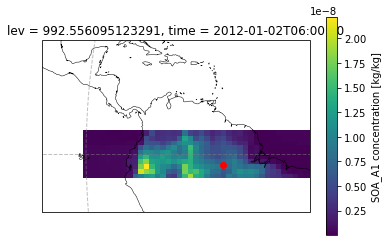

In [207]:
import cartopy.crs as ccrs

fig, ax = subplots_map()
ds['SOA_A1'].sel(lat=slice(-5,5), lon=slice(270,320)).isel(time=6).plot(ax = ax, transform = ccrs.PlateCarree())
plt.scatter(300.999,-2.15, marker='o',  c='r', transform=ccrs.PlateCarree())
fix_axis4map_plot(ax)

ax.set_extent((-100., -40., -10., 20.))

In [208]:
fn= '/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/SOA_A1_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2012-02-01_hour_locations.nc'

In [212]:
ds_col = xr.open_dataset(fn).isel(lev=-1)

In [213]:
ds_col

<xarray.Dataset>
Dimensions:   (time: 768, location: 7)
Coordinates:
    lev       float64 992.6
  * time      (time) datetime64[ns] 2012-01-02 ... 2012-02-02T23:00:00
  * location  (location) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
Data variables:
    SOA_A1    (location, time) float32 ...

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


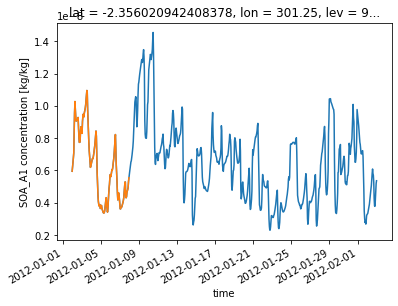

In [218]:
ds_col['SOA_A1'].sel(location='ATTO').plot()

ds['SOA_A1'].sel(lon=300.999, lat=-2.15, method='nearest').plot()

# UKESM:


In [235]:
fn = '/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/UKESM/CRES/sfmmroa_CRES_2013-01'
ds_col = xr.open_dataset(fn)

In [225]:
fn = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/UKESM/CRES/6hourly/sfmmroa_Cres6hrPt_UKESM1-0-LL_amip_r1i1p1f1_gn_201201010000-201212311800.nc'
ds= xr.open_dataset(fn)

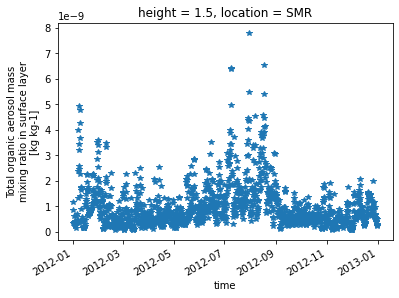

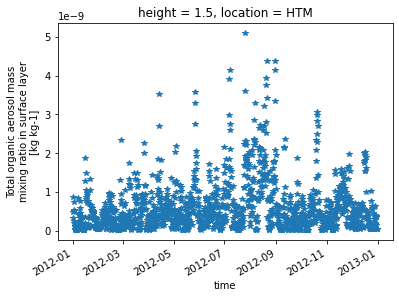

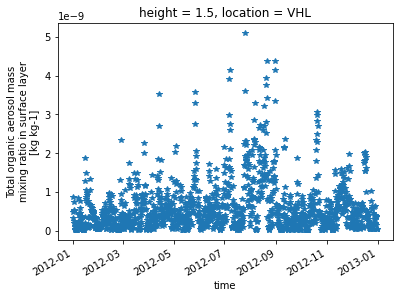

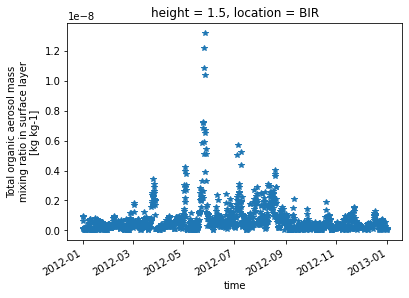

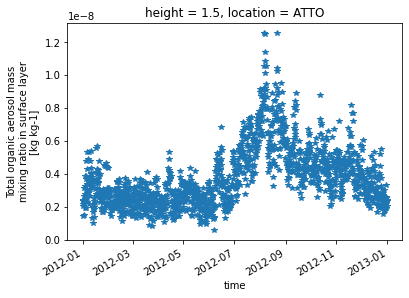

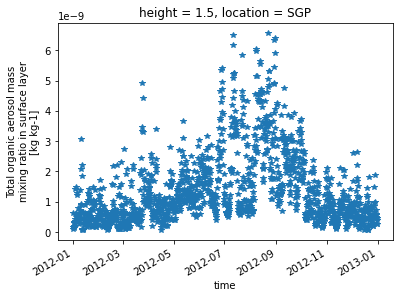

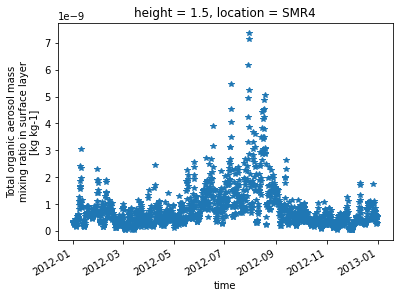

In [240]:
for i in range(7):
    ds_col['sfmmroa'].isel(location=i).plot(marker='*')
    plt.show()

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/indexes.py:224: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = index.get_loc(


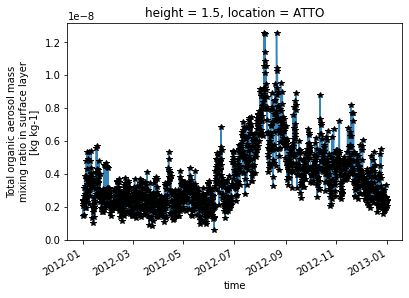

In [243]:

ds['sfmmroa'].sel(lon=300.999, lat=-2.15, method='nearest').plot(alpha=0.9)
ds_col['sfmmroa'].sel(location='ATTO').plot(c='k', marker='*')


In [244]:
fn = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/UKESM/CRES/6hourly/sfisop_Cres6hrPt_UKESM1-0-LL_amip_r1i1p1f1_gn_201201010000-201212311800.nc'
ds= xr.open_dataset(fn)

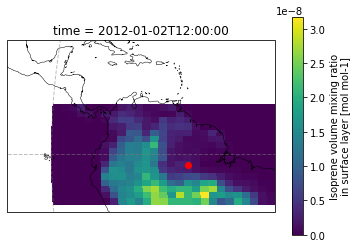

In [246]:
import cartopy.crs as ccrs

fig, ax = subplots_map()
ds['sfisop'].sel(lat=slice(-10,10), lon=slice(270,320)).isel(time=6).plot(ax = ax, transform = ccrs.PlateCarree())
plt.scatter(300.999,-2.15, marker='o',  c='r', transform=ccrs.PlateCarree())
fix_axis4map_plot(ax)

ax.set_extent((-100., -40., -10., 20.))

In [247]:
fn = '/proj/bolinc/users/x_sarbl/other_data/BS-FDBCK/UKESM/CRES/6hourly/sfmono_Cres6hrPt_UKESM1-0-LL_amip_r1i1p1f1_gn_201201010000-201212311800.nc'
ds= xr.open_dataset(fn)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


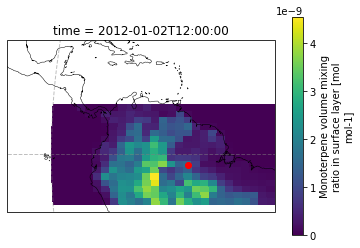

In [250]:
import cartopy.crs as ccrs

fig, ax = subplots_map()
ds['sfmono'].sel(lat=slice(-10,10), lon=slice(270,320)).isel(time=6).plot(ax = ax, transform = ccrs.PlateCarree())
plt.scatter(300.999,-2.15, marker='o',  c='r', transform=ccrs.PlateCarree())
fix_axis4map_plot(ax)

ax.set_extent((-100., -40., -10., 20.))